In [80]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import seaborn as sns


"""
partition G and
give a color to each community
"""
def divideG(G):
    communities = nx_comm.louvain_communities(G, weight='value', resolution=1, threshold=1e-07, seed=None)
    palette = sns.color_palette("hls", len(communities))

    for community in communities:
        for node in community:
            index = communities.index(community)
            G.nodes[node]["color"] = palette[index]

    return communities

"""
draw colored
"""
def drawG(G):
    colors = nx.get_node_attributes(G,'color').values()
    weights = nx.get_edge_attributes(G,'value').values()
    pos = nx.spring_layout(G, k=None)
    nx.draw(G, pos, width=list(weights), node_color=list(colors))


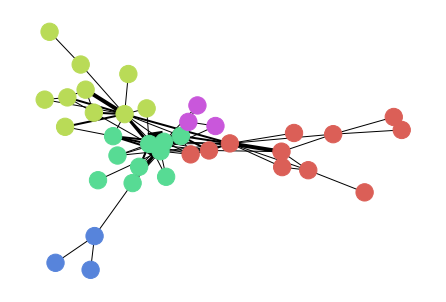

In [81]:
from pathlib import Path

pathlist = Path("./movies").rglob('*.gml')
graphs = []
for path in pathlist:
    graphs.append(nx.read_gml(path))

for graph in graphs:
    divideG(graph)

drawG(graphs[0])

In [76]:
nx.get_node_attributes(graphs[2],'color').values()

dict_values([])